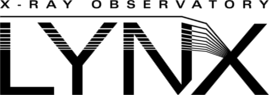

### Revision status
file: Ordersorting.ipynb not found in repository (path missing or new file not yet commited?).
        No versioning information can be displayed.

This document is git version controlled. The repository is available at https://github.com/hamogu/lynx-analysis.
See git commit log for full revision history.

Code was last run with:

- MARXS ray-trace code version 1.2.dev743 (commit hash: 3d1e5d248b from 2019-08-05)
- marx-lynx python code version 0.0.dev40 (commit hash: 19a8a4bdae from 2019-08-09)


In [1]:
from nbtemplate import display_header, get_path, display_codetoggle
display_header('Ordersorting.ipynb')

## Goal
In a CAT grating spectrometer, different orders fall in the same physical location. In XMM or Chandra, we typically see only one or two orders, but in the CAT XGS for Lynx, we will have ten or more orders (although some of them are weak) overlapping in the same physical location. Thus, order sorting needs to be performed using the intrinsic energy resolution of the detector. In this notebook, I put together a few plots and numbers to quantify which energy resolution we needs and how that impacts the performance

In [8]:
import numpy as np
from scipy.stats import norm
import astropy.units as u
import astropy.constants as c
from matplotlib import pyplot as plt

%matplotlib inline

In [41]:
d = 200 * u.nm
theta_peak = 2 * 1.6 * u.degree

In [42]:
delta_E = c.h * c.c / (d * np.sin(theta_peak))

The energy spacing $\Delta E$ between to consecutive orders does not depend on the order number:

$\Delta E = E_{\mathrm{n+1}} - E_{\mathrm{n}} =
\frac{hc}{\lambda_{\mathrm{n+1}}} - \frac{hc}{\lambda_{\mathrm{n}}} = 
\frac{hc}{\frac{d \sin{\theta}}{n+1}} - \frac{hc}{\frac{d \sin{\theta}}{n}} = 
\frac{hc}{d \sin{\theta}}$

where $h$ is the Plank constant, $c$ is the speeds of light and $d$ is the grating period. $\theta$ is the diffraction angle. For the CATXGS, we can look at the blaze peak for a typical spacing. Since the blaze peak is not very wide, the requirements are very similar in all places, just a little more stringent closer to the zeroths order and a little looser on the far side. For the blaze peak we find:

In [88]:
delta_E.to(u.eV)

<Quantity 111.05415145 eV>

In [74]:
sig_E = np.arange(5, 51, 2)
FWHM_E = sig_E * 2.355
extraction_width = np.arange(10, 111, 2)
fraction_enclosed = np.stack([1 - 2 * norm.sf(0.5*extraction_width, scale=sig) for sig in sig_E])
fraction_contam = np.stack([norm.sf(delta_E.to(u.eV).value - 0.5*extraction_width, scale=sig) for sig in sig_E])

Reading config file with path definitions: ['/melkor/d1/guenther/projects/Lynx/analysis/notebooks/../site.cfg']
Reading config file with path definitions: ['/melkor/d1/guenther/projects/Lynx/analysis/notebooks/../site.cfg']


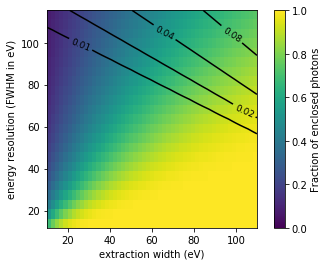

In [85]:
fig, ax = plt.subplots()
out = ax.imshow(fraction_enclosed, origin='lower',
          extent=(extraction_width.min(), extraction_width.max(), sig_E.min() * 2.355, sig_E.max() * 2.355),
               vmin=0)
cbar = plt.colorbar(out, ax=ax)
CS = ax.contour(extraction_width, FWHM_E, fraction_contam, [.01, .02, .04, .08], colors='k')
ax.clabel(CS, fontsize=9, inline=1, fmt='%1.2f')
ax.set_xlabel('extraction width (eV)')
ax.set_ylabel('energy resolution (FWHM in eV)')
cbar.set_label('Fraction of enclosed photons')

fig.savefig(get_path('figures') + '/ordersorting.png', 
            dpi=300, bbox_inches='tight')
fig.savefig(get_path('figures') + '/ordersorting.pdf', bbox_inches='tight')

The color shows the fraction of photons enclosed in a an order-sorting region given extraction width and detector performance.  The contour lines show the fraction of photons from order $n-1$ or $n+1$ that will be detected in order $n$.

In [89]:
display_codetoggle()